<a href="https://colab.research.google.com/github/melquemz/treinando_sklearn/blob/main/treinando_dados_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
from sklearn import datasets

In [2]:
diabetes = pd.read_csv("https://gist.githubusercontent.com/davidneves11/944edb5ecb7bf6d1770eae91cb20d049/raw/50d3d054185815b0c49561f94badedc06ef3c313/diabetes.csv")
diabetes.head()

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade,resultado
0,6,148,72,35,0,33.6,0.627,50,testado_positivo
1,1,85,66,29,0,26.6,0.351,31,testado_negativo
2,8,183,64,0,0,23.3,0.672,32,testado_positivo
3,1,89,66,23,94,28.1,0.167,21,testado_negativo
4,0,137,40,35,168,43.1,2.288,33,testado_positivo


In [3]:
batimentos = pd.read_csv("https://gist.githubusercontent.com/davidneves11/d72e7f49ab01c856acc5d07be4b1a9dd/raw/37631e3a40da92e6261c00fffdf0fb9b869b35dd/batimentos%2520cardiacos.csv")
batimentos.head()

,Idade,Peso,Horas de atividade,Batimentos cardiacos
0,44.247295,53.591343,3.397836,82.307425
1,81.427930,172.569375,33.142344,179.045377
2,50.807130,74.582817,8.645704,103.522796
3,55.778712,90.491878,12.622969,114.239779
4,53.790400,84.129280,11.032320,107.184063


In [4]:
colesterol = pd.read_csv("https://gist.githubusercontent.com/davidneves11/01b2963f7a8dfd87d79010fbf847b221/raw/685870f4365bcda4e5bb9e342285e0aac37dd556/colesterol.csv")
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


In [5]:
x = diabetes['idade']
y = diabetes['resultado']

X vai ser os features

In [6]:
x = diabetes.drop("resultado", axis = 1)
x

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
x_b = batimentos[['Peso','Idade']]
x_b

,Peso,Idade
0,53.591343,44.247295
1,172.569375,81.427930
2,74.582817,50.807130
3,90.491878,55.778712
4,84.129280,53.790400
...,...,...
995,188.432199,86.385062
996,115.620461,63.631394
997,139.842839,71.200887
998,111.959082,62.487213


Y vai ser a label

In [9]:
y = diabetes["resultado"]
y

0      testado_positivo
1      testado_negativo
2      testado_positivo
3      testado_negativo
4      testado_positivo
             ...       
763    testado_negativo
764    testado_negativo
765    testado_negativo
766    testado_positivo
767    testado_negativo
Name: resultado, Length: 768, dtype: object

In [10]:
y_b = batimentos['Batimentos cardiacos']
y_b

0       82.307425
1      179.045377
2      103.522796
3      114.239779
4      107.184063
          ...    
995    189.035111
996    130.773648
997    150.330074
998    129.754953
999    148.239707
Name: Batimentos cardiacos, Length: 1000, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split

SEED = 4121988

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

In [12]:
from sklearn.tree import DecisionTreeClassifier

clf_arvore = DecisionTreeClassifier(random_state = SEED, max_depth= 3)

In [13]:
clf_arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=4121988)

In [15]:
clf_arvore.score(x_teste, y_teste)

0.765625

In [16]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier(strategy='most_frequent')

clf_dummy.fit(x_treino, y_treino)

DummyClassifier(strategy='most_frequent')

In [17]:
clf_dummy.score(x_teste, y_teste)

0.6614583333333334

<Figure size 7200x3600 with 0 Axes>

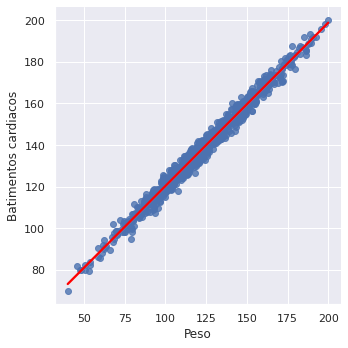

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(100, 50))

sns.lmplot(x='Peso', y='Batimentos cardiacos', data=batimentos,line_kws={'color':'red'})
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

SEED=4500

x_treino, x_teste, y_treino, y_teste = train_test_split(x_b, y_b, random_state = SEED)

In [20]:
from sklearn import linear_model

rgs = linear_model.LinearRegression(fit_intercept=False, normalize=True)

In [21]:
rgs.fit(x_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(fit_intercept=False, normalize=True)

In [22]:
rgs.score(x_teste, y_teste)

0.9872272899997122

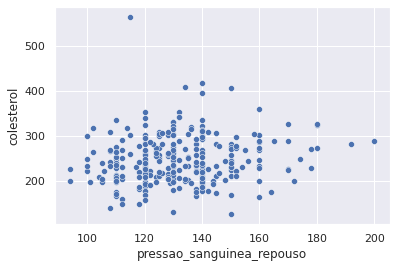

In [23]:
sns.scatterplot(x = 'pressao_sanguinea_repouso', y = 'colesterol', data = colesterol)

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, random_state = 9)

In [30]:
x = colesterol.select_dtypes('int64')
x

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,inclinacao,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,3,0,233
1,67,1,4,160,0,2,108,1,2,2,286
2,67,1,4,120,0,2,129,1,2,1,229
3,37,1,3,130,0,0,187,0,3,0,250
4,41,0,2,130,0,2,172,0,1,0,204
...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,0,0,132,0,2,1,264
299,68,1,4,144,1,0,141,0,2,2,193
300,57,1,4,130,0,0,115,1,2,3,131
301,57,0,2,130,0,2,174,0,2,1,236


In [31]:
kmeans.fit(x)
kmeans.labels_

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,

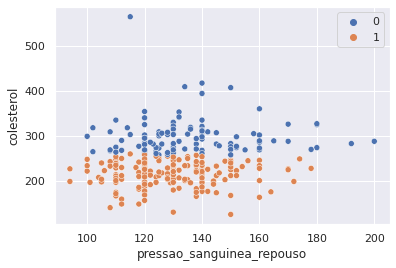

In [32]:
sns.scatterplot(x='pressao_sanguinea_repouso', y='colesterol', data= colesterol, hue = kmeans.labels_)

In [36]:
colesterol['clusters'] = kmeans.labels_
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol,clusters
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233,1
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286,0
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229,1
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250,1
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204,1


In [34]:
colesterol.groupby('clusters')['colesterol'].mean()

clusters
0    298.963964
1    216.473958
Name: colesterol, dtype: float64